In [80]:
# Import the modules
import numpy as np
import pandas as pd
import pickle
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import os
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn import tree
from sklearn.model_selection import train_test_split
import six
import pydot
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Needed for decision tree visualisation
# import pydotplus
from IPython.display import Image

In [56]:
plt.style.use('default')

In [57]:
# Loadin Data

file_path =  "../Resources/crop_recommendation_family_clean.csv"
df = pd.read_csv(file_path)
df.head(450)


,N,P,K,temperature,humidity,ph,rainfall,crop_name,kingdom,order,family,genus,botanical_name
0,90,42,43,20.88,82.00,6.50,202.94,rice,plantae,poales,poaceae,oryza,oryza sativa
1,85,58,41,21.77,80.32,7.04,226.66,rice,plantae,poales,poaceae,oryza,oryza sativa
2,60,55,44,23.00,82.32,7.84,263.96,rice,plantae,poales,poaceae,oryza,oryza sativa
3,74,35,40,26.49,80.16,6.98,242.86,rice,plantae,poales,poaceae,oryza,oryza sativa
4,78,42,42,20.13,81.60,7.63,262.72,rice,plantae,poales,poaceae,oryza,oryza sativa
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,23,75,25,31.08,47.20,7.08,91.31,pigeon_pea,plantae,fabales,fabaceae,cajanus,cajanus cajan
446,32,70,20,20.89,46.25,6.21,195.57,pigeon_pea,plantae,fabales,fabaceae,cajanus,cajanus cajan
447,28,59,22,30.91,52.80,7.05,170.99,pigeon_pea,plantae,fabales,fabaceae,cajanus,cajanus cajan
448,5,62,23,27.93,66.45,4.72,145.37,pigeon_pea,plantae,fabales,fabaceae,cajanus,cajanus cajan


In [58]:
df = df.replace(['rice', 'maize', 'chickpea', 'kidney_bean', 'pigeon_pea',
       'moth_bean', 'mung_bean', 'urad_bean', 'lentil', 'pomegranate',
       'banana', 'mango', 'grape', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],['Rice', 'Maize', 'Chickpea', 'Kidney Bean', 'Pigeon Pea',
       'Moth Bean', 'Mung Bean', 'Urad Bean', 'Lentil', 'Pomegranate',
       'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple',
       'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee'])
df['crop_name'].unique()


array(['Rice', 'Maize', 'Chickpea', 'Kidney Bean', 'Pigeon Pea',
       'Moth Bean', 'Mung Bean', 'Urad Bean', 'Lentil', 'Pomegranate',
       'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple',
       'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee'],
      dtype=object)

In [59]:
crop_name = ['Rice', 'Maize', 'Chickpea', 'Kidney Bean', 'Pigeon Pea',
       'Moth Bean', 'Mung Bean', 'Urad Bean', 'Lentil', 'Pomegranate',
       'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple',
       'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee']
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

crop_info = {}
for i in crop_name:
    df_range = df[df['crop_name'] == i]
    crop_info[i] = {}

    for j in features:
        x_feature = [df_range[j].min(),df_range[j].max()]
        crop_info[i][j] = x_feature
# Create pickle file to store feature range for all the crop
pickle.dump(crop_info, open('../models_pickle/crop_info.pkl','wb'))
pickle.dump(crop_name,open('../models_pickle/crop_name.pkl','wb'))


In [60]:

# Define features set
X = df.copy()
X.drop(columns=['crop_name',
       'kingdom', 'order', 'family', 'genus', 'botanical_name'],inplace=True)
X.head()

# Define Target
y = df['crop_name']


In [61]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,random_state=1,stratify=y)



## Logistic Regression

In [62]:
# Create logistic regression model
logistic_regression_model = LogisticRegression(random_state=1,max_iter=1000,multi_class='multinomial')

# Fit the training dataset
logistic_regression_model.fit(X_train,y_train)

# Create pickle file to store logistic model 
pickle.dump(logistic_regression_model, open('../models_pickle/lr_model.pkl','wb'))

# Predict output
logistic_predicitiion = logistic_regression_model.predict(X_test)

## Calculating the accuracy score
acc_score_lr = accuracy_score(y_test, logistic_predicitiion)


# Displaying results
print("Confusion Matrix")
print(f"Accuracy Score : {acc_score_lr}")
print("Classification Report")
print(classification_report(y_test, logistic_predicitiion))

pd.DataFrame({"Prediction":logistic_predicitiion,'Actual':y_test})

Confusion Matrix
Accuracy Score : 0.975
Classification Report
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        20
      Banana       1.00      1.00      1.00        20
    Chickpea       1.00      1.00      1.00        20
     Coconut       1.00      1.00      1.00        20
      Coffee       1.00      1.00      1.00        20
      Cotton       1.00      0.95      0.97        20
      Grapes       1.00      1.00      1.00        20
        Jute       0.86      0.90      0.88        20
 Kidney Bean       1.00      1.00      1.00        20
      Lentil       0.95      0.95      0.95        20
       Maize       0.95      1.00      0.98        20
       Mango       1.00      1.00      1.00        20
   Moth Bean       0.94      0.85      0.89        20
   Mung Bean       0.95      1.00      0.98        20
   Muskmelon       1.00      1.00      1.00        20
      Orange       1.00      1.00      1.00        20
      Papaya       

c:\Users\kk\anaconda3\envs\kkdev\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Prediction,Actual
365,Kidney Bean,Kidney Bean
47,Rice,Rice
1226,Grapes,Grapes
76,Rice,Rice
2013,Papaya,Jute
...,...,...
490,Pigeon Pea,Pigeon Pea
1859,Coconut,Coconut
885,Lentil,Lentil
122,Maize,Maize


<Axes: title={'center': 'Logistic Regression - Features Importances'}, ylabel='1'>

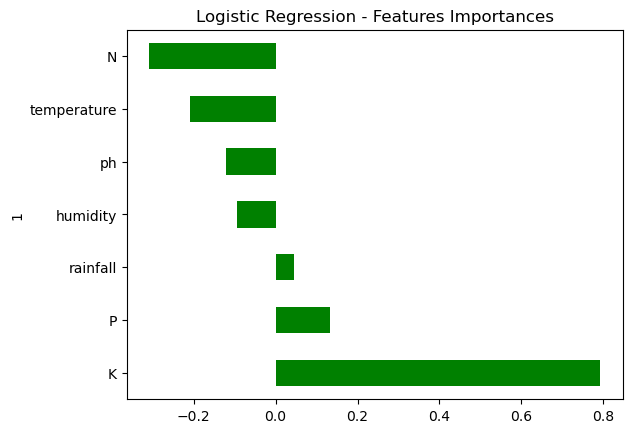

In [63]:
importances_df = pd.DataFrame(sorted(zip(logistic_regression_model.coef_[0], X_train.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_df.plot(kind='barh', color='green', title= 'Logistic Regression - Features Importances', legend=False)

## Decision Tree

Confusion Matrix
Accuracy Score : 0.9977272727272727
Classification Report
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        20
      Banana       1.00      1.00      1.00        20
    Chickpea       1.00      1.00      1.00        20
     Coconut       1.00      1.00      1.00        20
      Coffee       1.00      1.00      1.00        20
      Cotton       1.00      1.00      1.00        20
      Grapes       1.00      1.00      1.00        20
        Jute       1.00      1.00      1.00        20
 Kidney Bean       1.00      1.00      1.00        20
      Lentil       0.95      1.00      0.98        20
       Maize       1.00      1.00      1.00        20
       Mango       1.00      1.00      1.00        20
   Moth Bean       1.00      0.95      0.97        20
   Mung Bean       1.00      1.00      1.00        20
   Muskmelon       1.00      1.00      1.00        20
      Orange       1.00      1.00      1.00        20
      

<Axes: title={'center': 'Decision Tree Features Importances'}, ylabel='1'>

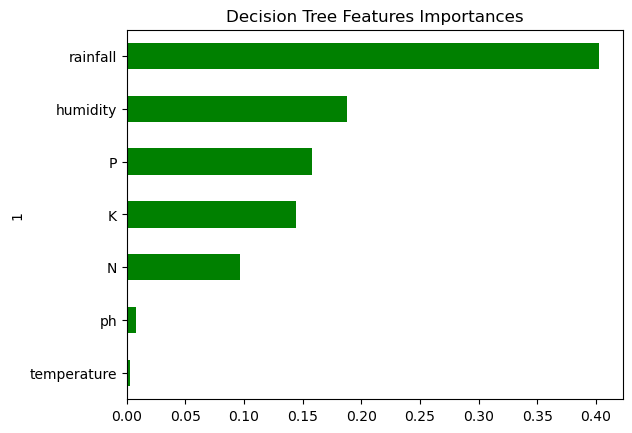

In [64]:
# Creating the decision tree classifier instance
DT_model = tree.DecisionTreeClassifier()

# Fitting the model
DT_model = DT_model.fit(X_train, y_train)

# Create pickle file to store logistic model 
pickle.dump(DT_model, open('../models_pickle/dt_model.pkl','wb'))

# Making predictions using the testing data
DT_predictions = DT_model.predict(X_test)

## Calculating the accuracy score
acc_score_DT = accuracy_score(y_test, DT_predictions)


# Displaying results
print("Confusion Matrix")
print(f"Accuracy Score : {acc_score_DT}")
print("Classification Report")
print(classification_report(y_test, DT_predictions))
pd.DataFrame({"Prediction":DT_predictions,'Actual':y_test})


importances_df = pd.DataFrame(sorted(zip(DT_model.feature_importances_, X_train.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='green', title= 'Decision Tree Features Importances', legend=False)

In [65]:
# Text Representation of the DT_model
text_representation = tree.export_text(DT_model)
print(text_representation)

|--- feature_6 <= 30.40
|   |--- class: Muskmelon
|--- feature_6 >  30.40
|   |--- feature_4 <= 27.98
|   |   |--- feature_2 <= 50.00
|   |   |   |--- class: Kidney Bean
|   |   |--- feature_2 >  50.00
|   |   |   |--- class: Chickpea
|   |--- feature_4 >  27.98
|   |   |--- feature_2 <= 125.00
|   |   |   |--- feature_4 <= 73.24
|   |   |   |   |--- feature_0 <= 59.50
|   |   |   |   |   |--- feature_6 <= 82.10
|   |   |   |   |   |   |--- feature_4 <= 60.02
|   |   |   |   |   |   |   |--- class: Moth Bean
|   |   |   |   |   |   |--- feature_4 >  60.02
|   |   |   |   |   |   |   |--- feature_6 <= 57.68
|   |   |   |   |   |   |   |   |--- feature_1 <= 50.00
|   |   |   |   |   |   |   |   |   |--- class: Moth Bean
|   |   |   |   |   |   |   |   |--- feature_1 >  50.00
|   |   |   |   |   |   |   |   |   |--- class: Lentil
|   |   |   |   |   |   |   |--- feature_6 >  57.68
|   |   |   |   |   |   |   |   |--- feature_1 <= 53.00
|   |   |   |   |   |   |   |   |   |--- class: Moth 

In [66]:
# Save the text representation
with open("DT_text.log", "w") as fout:
    fout.write(text_representation)

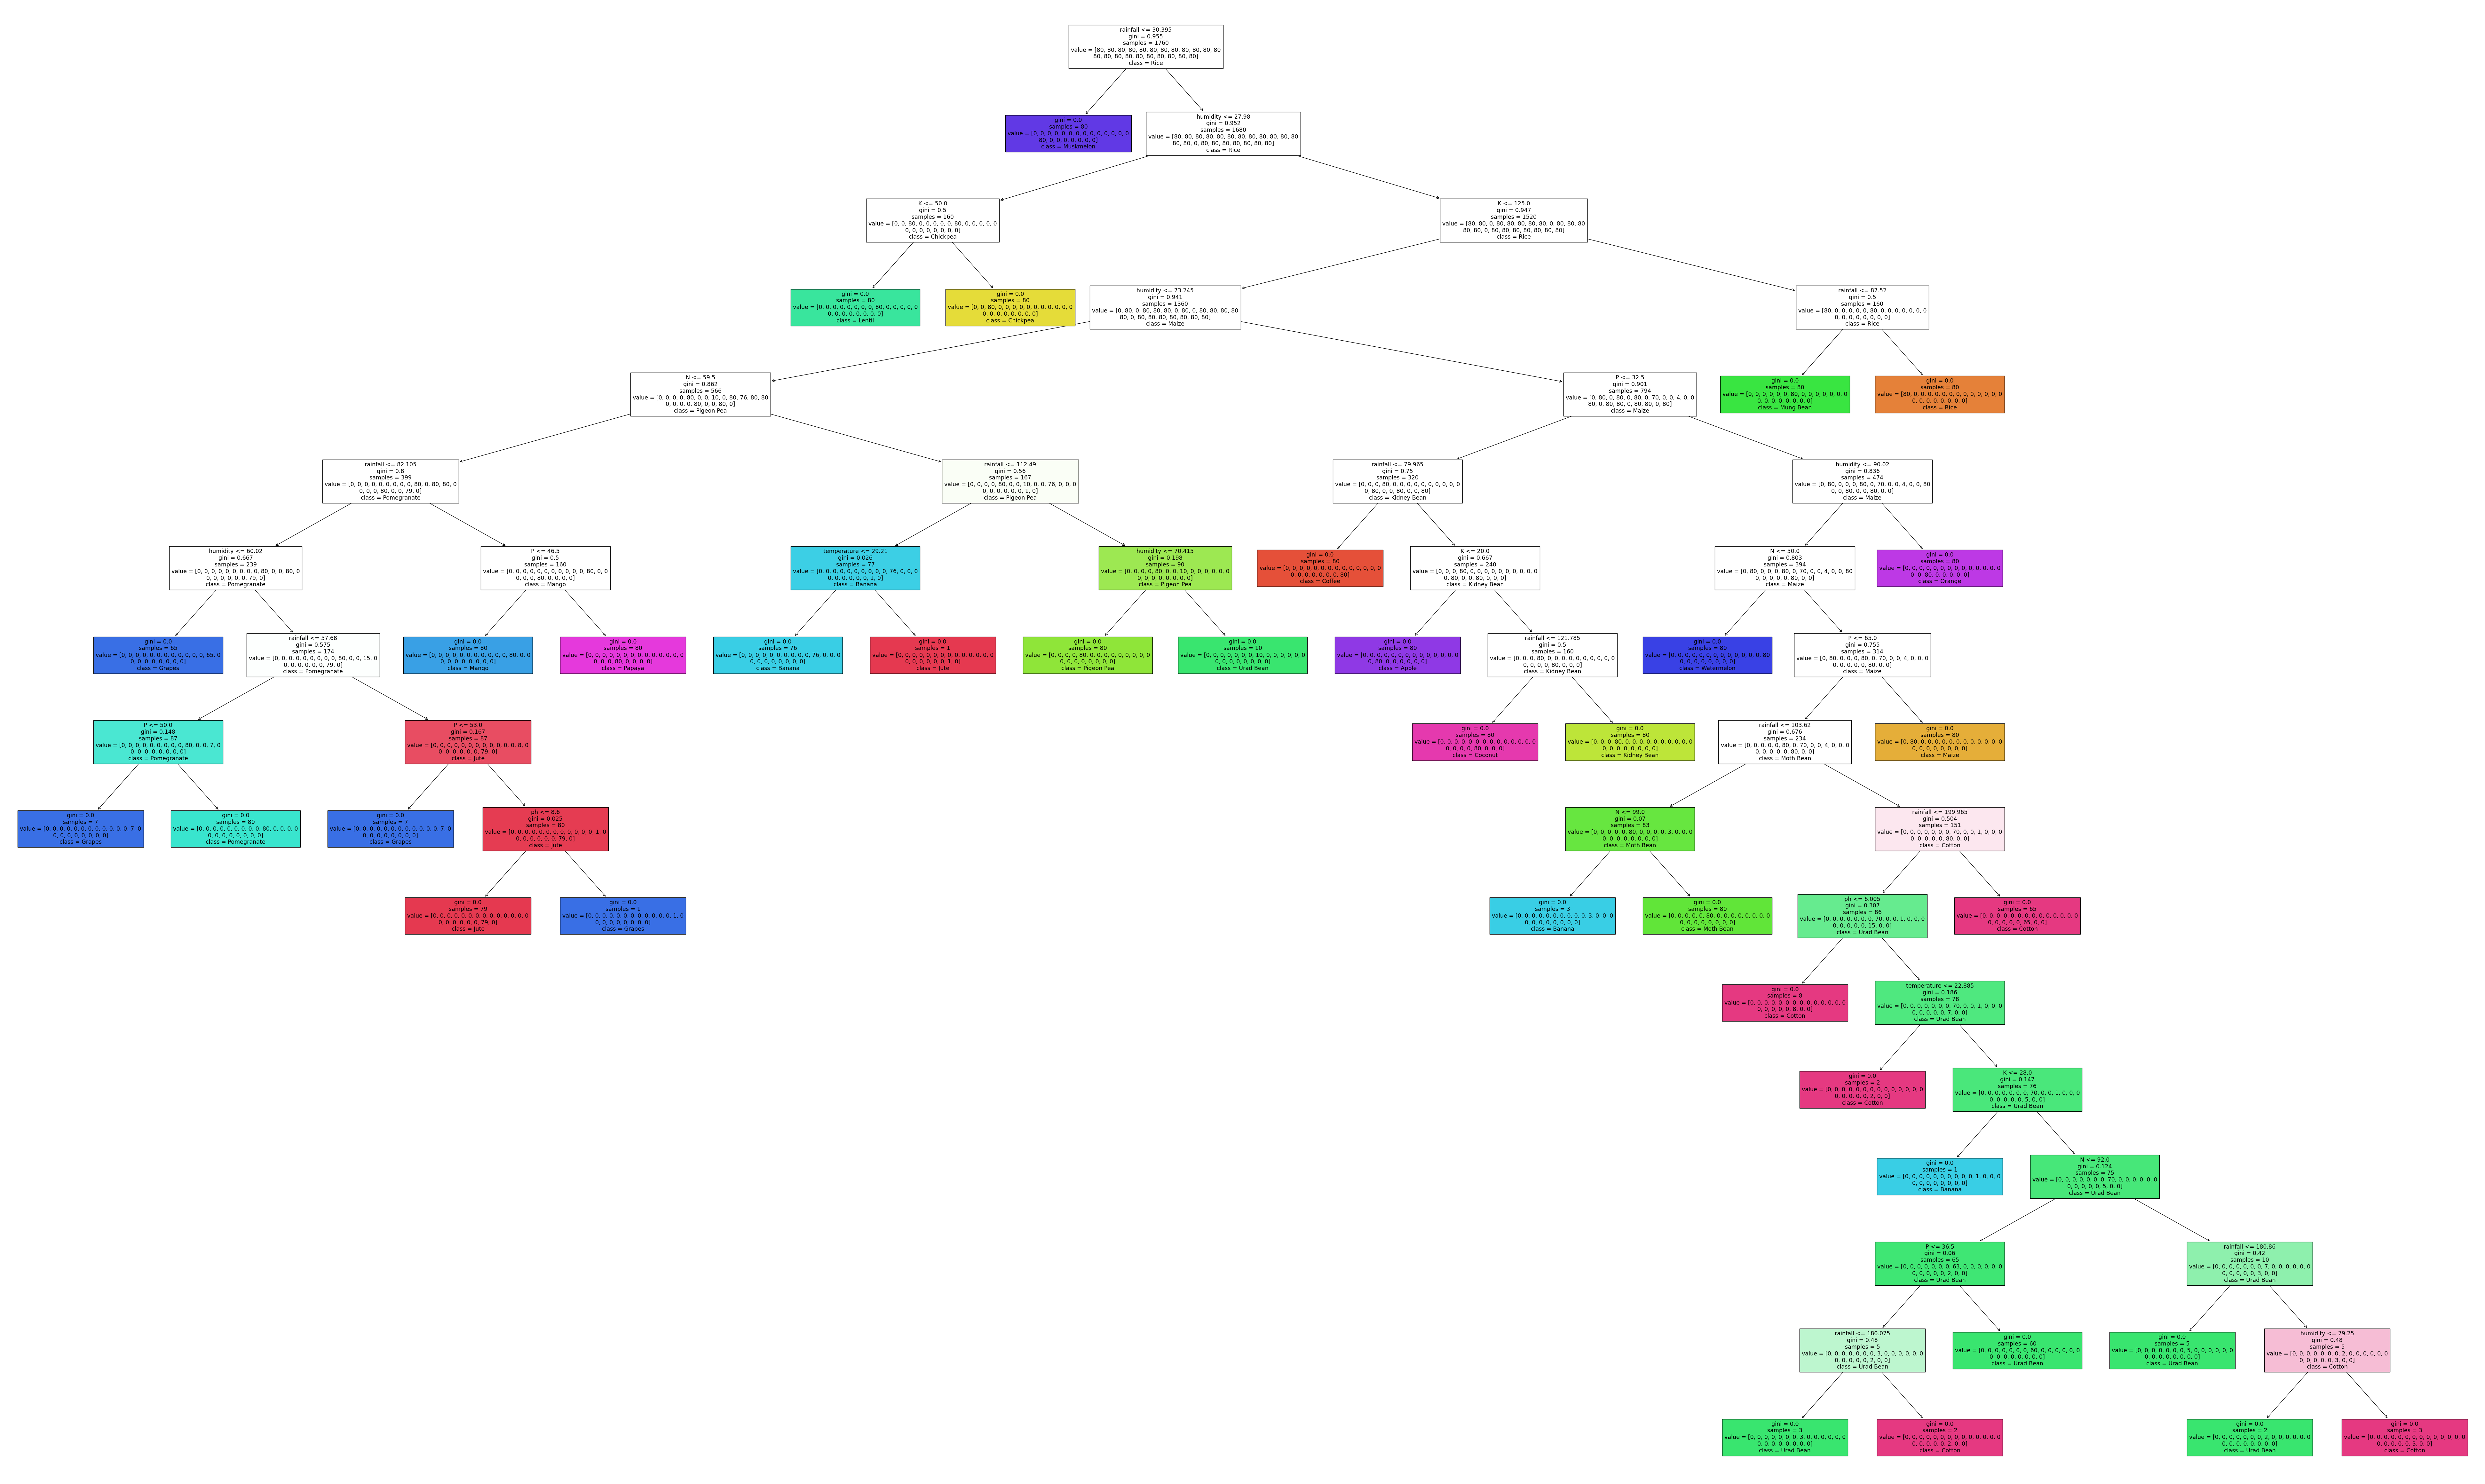

In [67]:
#Plot the DT model
fig = plt.figure(figsize=(100,60))
_ = tree.plot_tree(DT_model, 
                   feature_names=features,  
                   class_names=crop_name,
                   filled=True)

In [68]:
fig.savefig("DT_output.png")

## Random Forest 

Confusion Matrix
Accuracy Score : 0.9954545454545455
Classification Report
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        20
      Banana       1.00      1.00      1.00        20
    Chickpea       1.00      1.00      1.00        20
     Coconut       1.00      1.00      1.00        20
      Coffee       1.00      1.00      1.00        20
      Cotton       1.00      1.00      1.00        20
      Grapes       1.00      1.00      1.00        20
        Jute       0.95      1.00      0.98        20
 Kidney Bean       1.00      1.00      1.00        20
      Lentil       0.95      1.00      0.98        20
       Maize       1.00      1.00      1.00        20
       Mango       1.00      1.00      1.00        20
   Moth Bean       1.00      0.95      0.97        20
   Mung Bean       1.00      1.00      1.00        20
   Muskmelon       1.00      1.00      1.00        20
      Orange       1.00      1.00      1.00        20
      

<Axes: title={'center': 'Random Forest Features Importances'}, ylabel='1'>

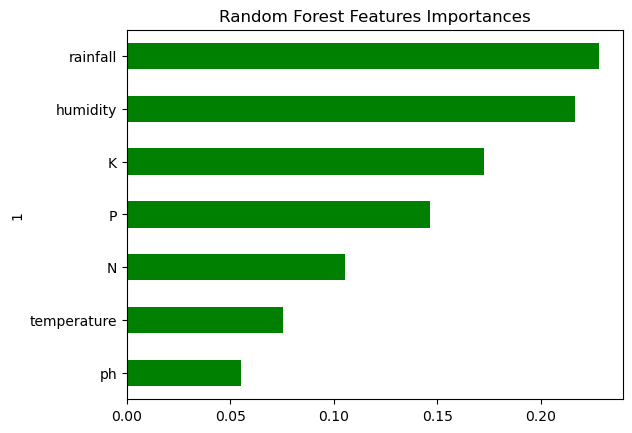

In [73]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train, y_train)

# Create pickle file to store logistic model 
pickle.dump(rf_model, open('../models_pickle/rf_model.pkl','wb'))

# Making predictions using the testing data
rf_predictions = rf_model.predict(X_test)

## Calculating the accuracy score
acc_score_rf = accuracy_score(y_test, rf_predictions)

# Displaying results
print("Confusion Matrix")
print(f"Accuracy Score : {acc_score_rf}")
print("Classification Report")
print(classification_report(y_test, rf_predictions))
pd.DataFrame({"Prediction":rf_predictions,'Actual':y_test})

importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='green', title= 'Random Forest Features Importances', legend=False)

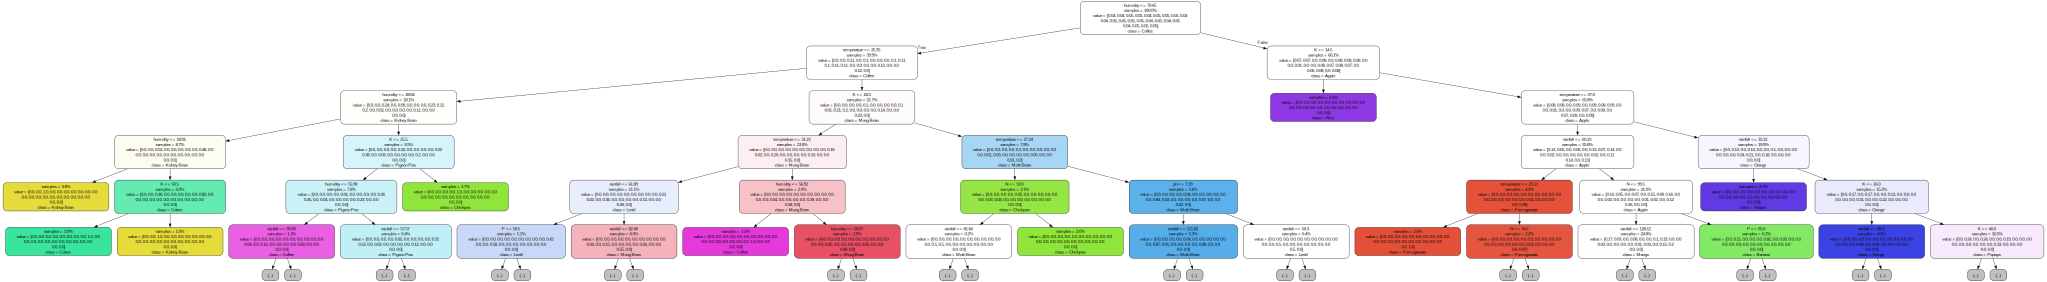

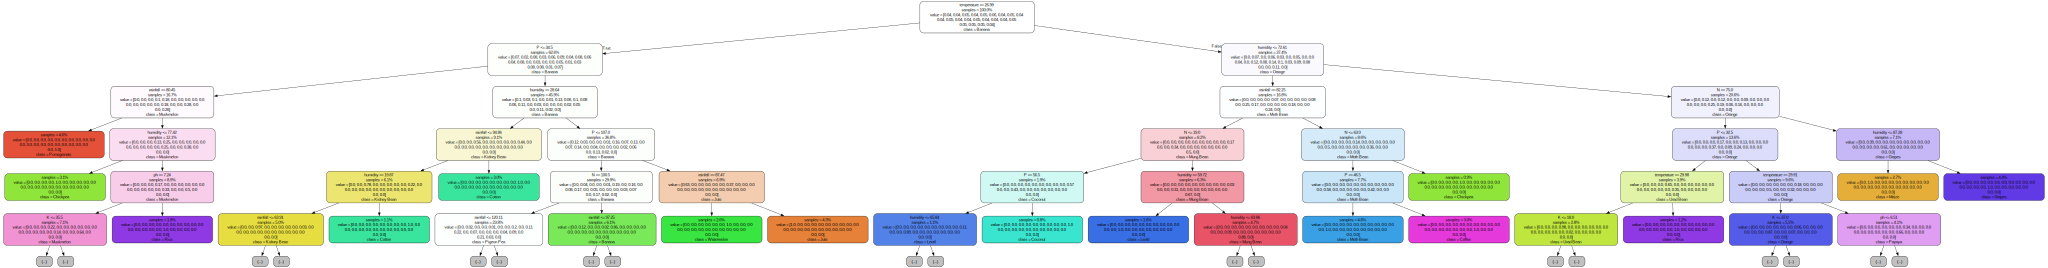

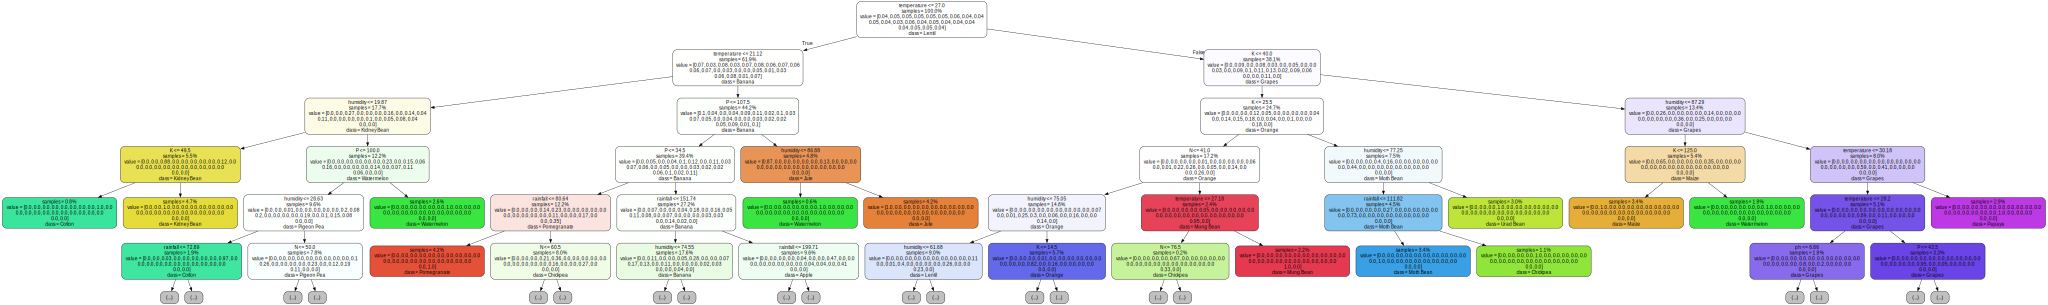

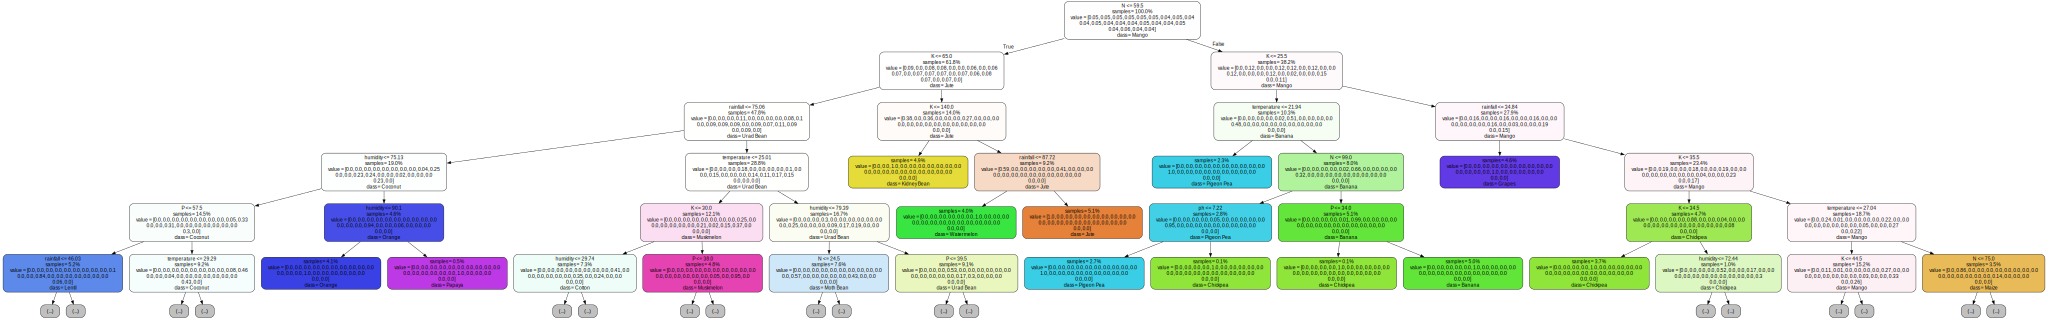

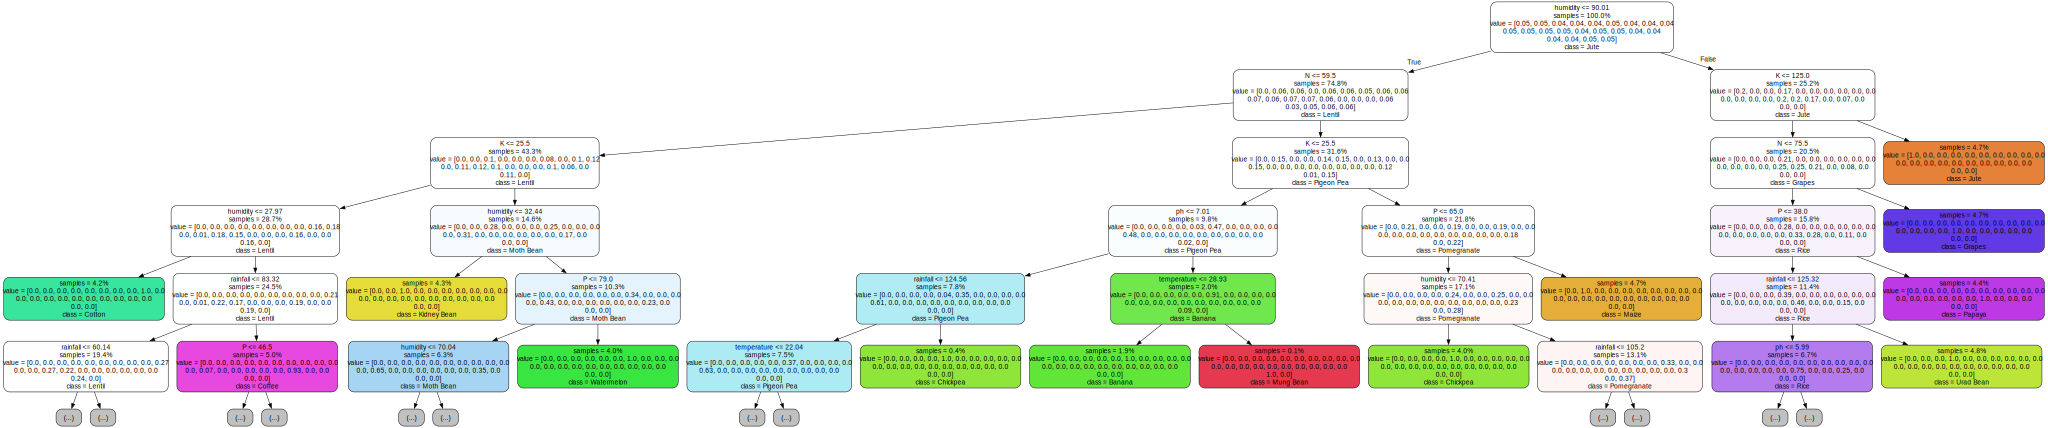

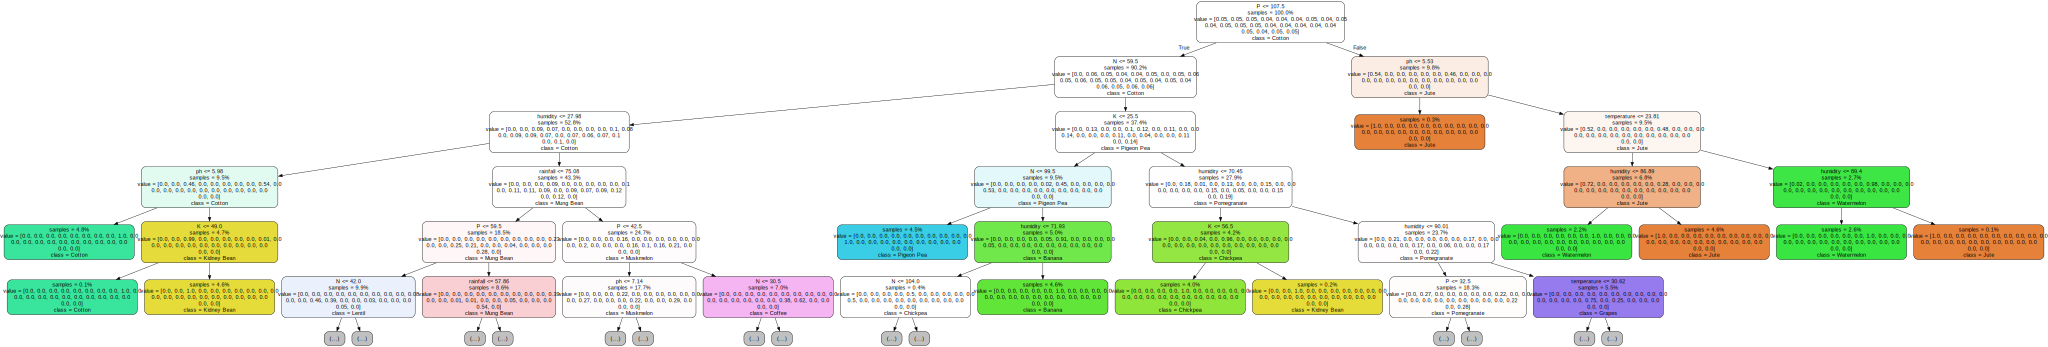

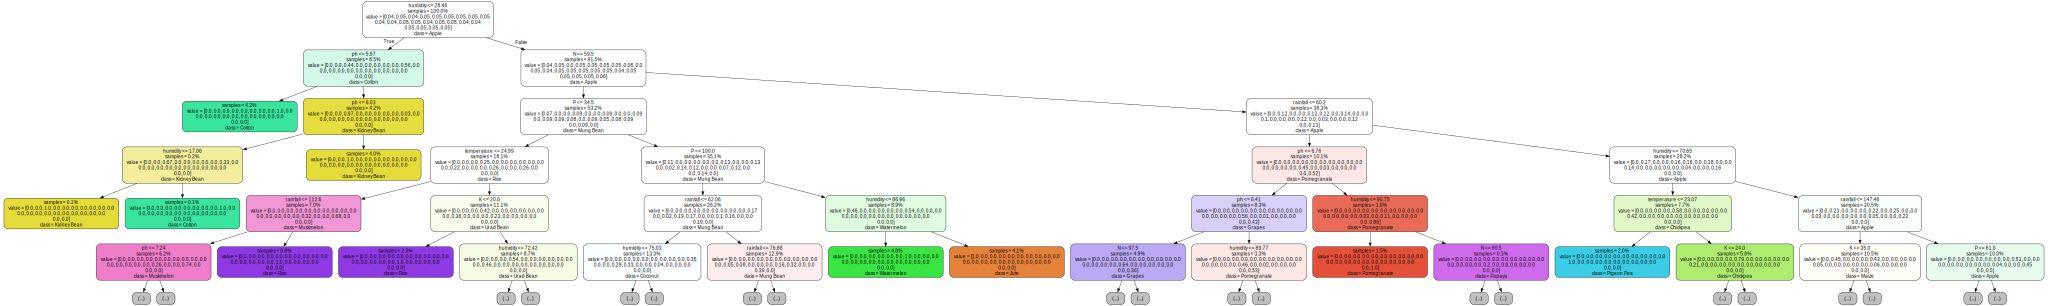

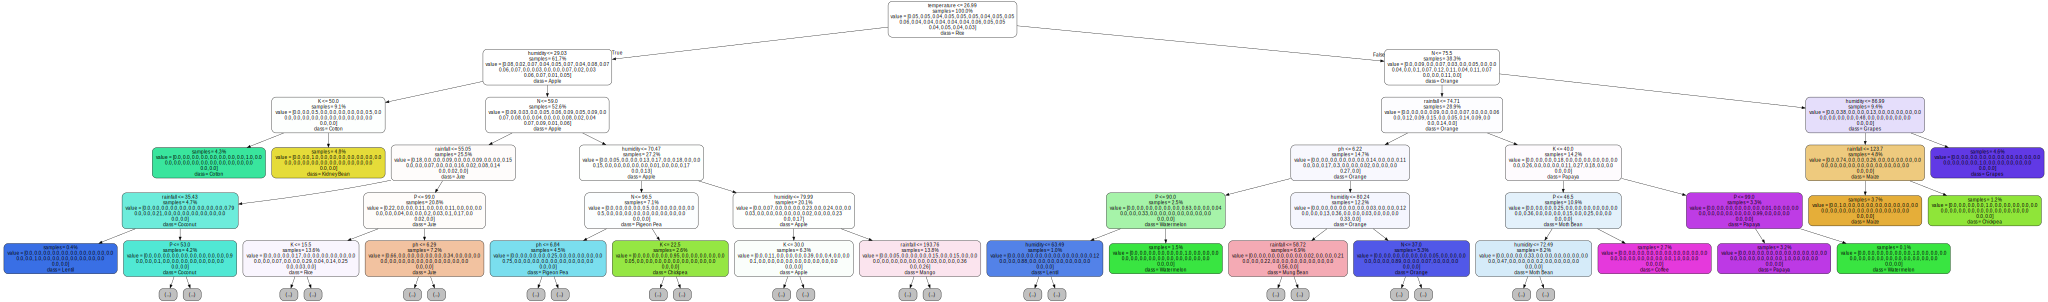

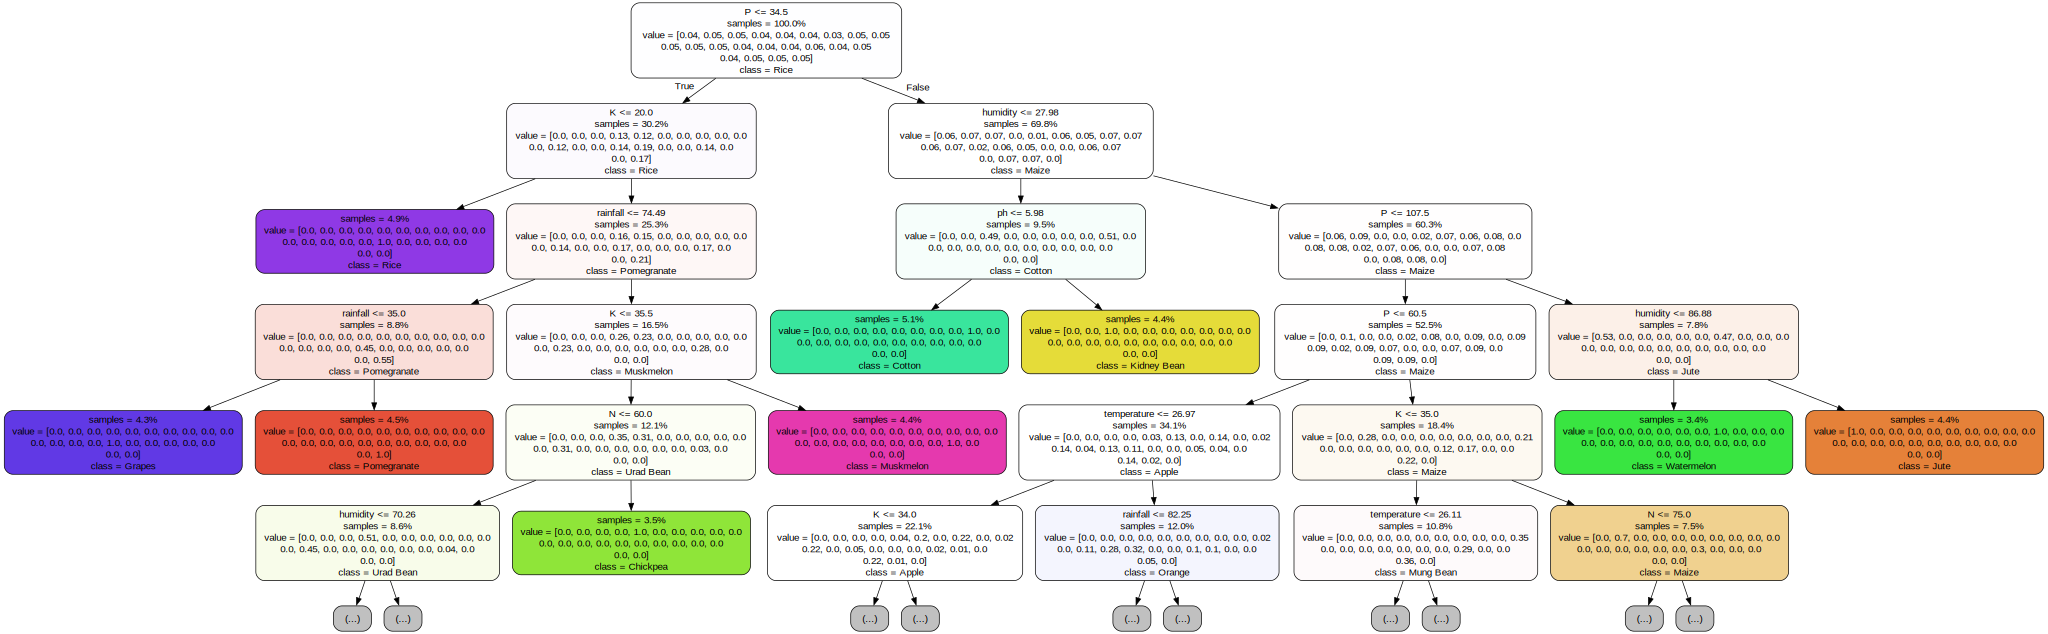

In [94]:
for i in range(9):
    tree = rf_model.estimators_[i]
    plot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,
                               class_names=y_train.unique(),
                                 rounded=True,  
                               max_depth=5,
                               precision=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(plot_data)
    display(graph)
    graph.render(f'rf_model_tree_viz{i}')
    graph.render(output_path)


## KNN

In [ ]:
# Instantiate the model with k = 3 neighbours
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn_model.fit(X_train, y_train)

# Create pickle file to store KNN model 
pickle.dump(knn_model, open('../models_pickle/knn_model.pkl','wb'))

# Create predictions
knn_predictions = knn_model.predict(X_test)

## Calculating the accuracy score
acc_score_knn = accuracy_score(y_test, knn_predictions)

# Displaying results
print("Confusion Matrix")
print(f"Accuracy Score : {acc_score_knn}")
print("Classification Report")
print(classification_report(y_test, knn_predictions))
pd.DataFrame({"Prediction":knn_predictions,'Actual':y_test})

Confusion Matrix
Accuracy Score : 0.9727272727272728
Classification Report
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        20
      Banana       1.00      1.00      1.00        20
    Chickpea       1.00      1.00      1.00        20
     Coconut       1.00      1.00      1.00        20
      Coffee       1.00      0.95      0.97        20
      Cotton       1.00      0.95      0.97        20
      Grapes       1.00      1.00      1.00        20
        Jute       0.78      0.90      0.84        20
 Kidney Bean       1.00      1.00      1.00        20
      Lentil       0.86      0.95      0.90        20
       Maize       0.95      1.00      0.98        20
       Mango       1.00      1.00      1.00        20
   Moth Bean       0.94      0.85      0.89        20
   Mung Bean       1.00      1.00      1.00        20
   Muskmelon       1.00      1.00      1.00        20
      Orange       1.00      1.00      1.00        20
      

,Prediction,Actual
365,Kidney Bean,Kidney Bean
47,Rice,Rice
1226,Grapes,Grapes
76,Rice,Rice
2013,Papaya,Jute
...,...,...
490,Pigeon Pea,Pigeon Pea
1859,Coconut,Coconut
885,Lentil,Lentil
122,Maize,Maize


## SVM

In [ ]:
# Support vector machine linear classifier
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)

# Create pickle file to store KNN model 
pickle.dump(svc_model, open('../models_pickle/svc_model.pkl','wb'))

# Create predictions
svc_predictions = svc_model.predict(X_test)

## Calculating the accuracy score
acc_score_svc = accuracy_score(y_test, svc_predictions)

# Displaying results
print("Confusion Matrix")
print(f"Accuracy Score : {acc_score_svc}")
print("Classification Report")
print(classification_report(y_test, svc_predictions))
pd.DataFrame({"Prediction":svc_predictions,'Actual':y_test})



Confusion Matrix
Accuracy Score : 0.9818181818181818
Classification Report
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        20
      Banana       1.00      1.00      1.00        20
    Chickpea       1.00      1.00      1.00        20
     Coconut       1.00      1.00      1.00        20
      Coffee       1.00      0.95      0.97        20
      Cotton       1.00      1.00      1.00        20
      Grapes       1.00      1.00      1.00        20
        Jute       0.78      0.90      0.84        20
 Kidney Bean       1.00      1.00      1.00        20
      Lentil       0.95      1.00      0.98        20
       Maize       1.00      1.00      1.00        20
       Mango       1.00      1.00      1.00        20
   Moth Bean       1.00      0.95      0.97        20
   Mung Bean       1.00      1.00      1.00        20
   Muskmelon       1.00      1.00      1.00        20
      Orange       1.00      1.00      1.00        20
      

,Prediction,Actual
365,Kidney Bean,Kidney Bean
47,Rice,Rice
1226,Grapes,Grapes
76,Rice,Rice
2013,Papaya,Jute
...,...,...
490,Pigeon Pea,Pigeon Pea
1859,Coconut,Coconut
885,Lentil,Lentil
122,Maize,Maize


<Axes: title={'center': 'SVM Features Importances'}, ylabel='1'>

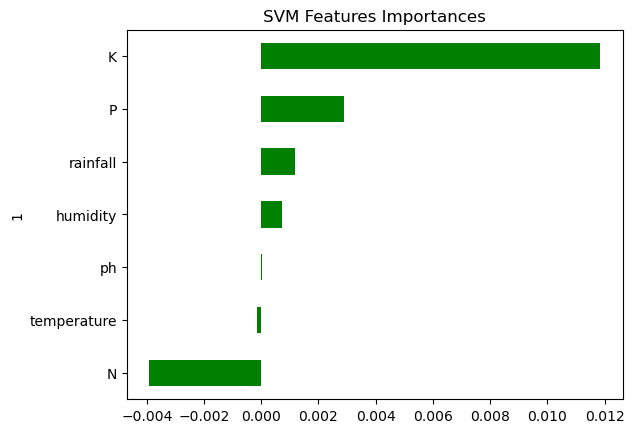

In [ ]:
importances_df = pd.DataFrame(sorted(zip(svc_model.coef_[0], X_train.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='green', title= 'SVM Features Importances', legend=False)

## Model Accuracy Comparision

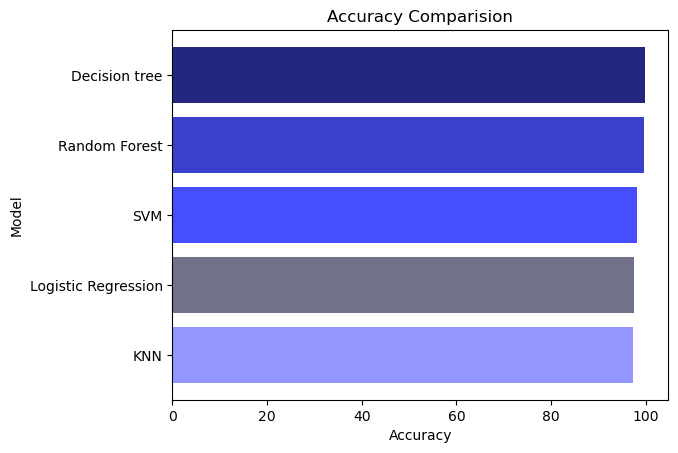

In [ ]:
accu_df = pd.DataFrame({'Models':['Logistic Regression','Decision tree','Random Forest','KNN','SVM'] ,'Model_Accuracy':[acc_score_lr*100,acc_score_DT*100,acc_score_rf*100,acc_score_knn*100,acc_score_svc*100]})
accu_df.sort_values('Model_Accuracy',inplace=True)
plt.title ('Accuracy Comparision')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.barh(accu_df['Models'],accu_df['Model_Accuracy'],color=['#9497FF', '#71728A', '#474EFF', '#3A40CC', '#242780'])
plt.savefig('../static/image/accuracy.png')
plt.show()

In [ ]:
# sample test data

sample_coffee = pd.DataFrame({'N':99,'P':15,'K':27,'temperature':27,'humidity':56,'ph':6.09,'rainfall':127.92},index=[0])
sample_maize = pd.DataFrame({'N':70,'P':47,'K':17,'temperature':24,'humidity':70,'ph':6.60,'rainfall':104.16},index=[0]) 
sample_rice = pd.DataFrame({'N':12,'P':58,'K':41,'temperature':21,'humidity':80,'ph':7.04,'rainfall':226.66},index=[0])
sample = pd.DataFrame({'N':12,'P':140,'K':130,'temperature':35,'humidity':75,'ph':5,'rainfall':150},index=[0])
#Predcit
# print(maize_features)

print(rf_model.predict(sample))




['Grapes']
